In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2021-03-31 15:38:21--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-03-31 15:38:58--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl.2’

AgesAndHeights.pkl. 100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-03-31 15:38:59 (269 MB/s) - ‘AgesAndHeights.pkl.2’ saved [2406/2406]



In [ ]:
data = pd.read_pickle('AgesAndHeights.pkl')
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


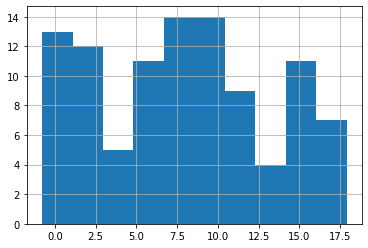

In [ ]:
ages = data['Age']
heights = data['Height']
ages.hist()


In [ ]:
ages[ages < 0 ]

13   -0.163532
20   -0.683017
25   -0.146392
30   -0.780853
36   -0.087958
59   -0.548488
91   -0.328780
Name: Age, dtype: float64

In [ ]:
data = data[ages > 0]
ages = data['Age']
heights = data['Height']
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8faca5a410>,
      dtype=object)

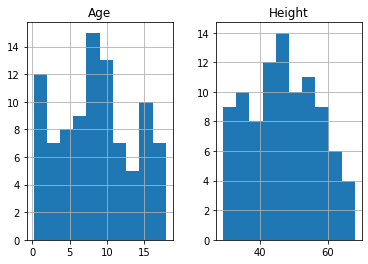

In [ ]:
data.hist()

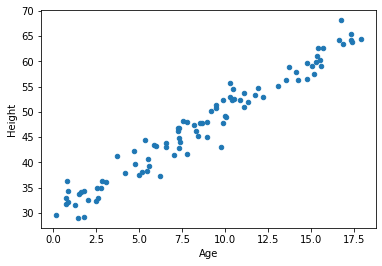

In [ ]:
data.plot.scatter(x='Age', y='Height')

In [ ]:
fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                              'y': 'Height (inches)'})
fig.show()

In [ ]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()
ages_np

array([14.76787382,  3.10767135,  7.26691701,  1.81517968, 16.75375763,
        5.35126307,  8.65571488,  4.20599293,  7.35669106,  1.66817819,
        8.2969588 , 14.74948482, 15.28545214, 16.65534197,  0.85918789,
        8.43332999, 11.92386163,  0.76828323, 11.36202254,  1.29597926,
       10.31206094, 17.39335272, 10.31003056,  6.23764582, 15.55153122,
        2.77346425, 15.59798962,  7.57789784,  2.04165705,  9.90665221,
        2.87252515,  1.54231936,  5.46202264, 15.04362695,  5.99372597,
        4.805291  ,  8.94992003,  5.02020985,  9.89555258,  5.20281507,
        0.19568558,  0.89217393,  7.30979593, 10.8545723 , 15.69876495,
        0.81216582, 15.40144747,  9.21599924,  8.98515379,  3.74369906,
        0.75192511,  6.5963469 ,  9.75112683,  7.40094567, 17.32712575,
       10.53406938, 15.16816596,  9.46971876, 13.54691548,  7.80132294,
        2.51910344,  4.71666526, 10.0386595 , 11.77125476,  8.53738026,
        2.58355771,  1.438003  , 10.40642157, 16.85933332, 12.22

In [ ]:
ages_np.shape

(93,)

In [ ]:
ages_np_reshaped = ages_np.reshape(len(ages), 1)
ages_np_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [ ]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_

array([2.0014169])

In [ ]:
x_new = np.array(list(range(19))).reshape(19, 1)
preds = model.predict(x_new)

fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                              'y': 'Height (inches)'})


fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))
fig.write_image('base_pic.svg', width=800)
fig.show()

In [ ]:
from joblib import dump, load

In [ ]:
dump(model, 'model.joblib')

['model.joblib']

In [ ]:
model_in = load('model.joblib')
model_in.predict(np.array([[1]]))

array([31.96327451])

In [ ]:
def make_picture(training_data_filename, model, new_inp_np_arr, output_file):
  data = pd.read_pickle(training_data_filename)
  ages = data['Age']
  data = data[ages > 0]
  ages = data['Age']
  heights = data['Height']
  x_new = np.array(list(range(19))).reshape(19, 1)
  preds = model.predict(x_new)

  fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                                'y': 'Height (inches)'})

  fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))

  new_preds = model.predict(new_inp_np_arr)

  fig.add_trace(go.Scatter(x=new_inp_np_arr.reshape(len(new_inp_np_arr)), y=new_preds, name='New Outputs', mode='markers', marker=dict(color='purple', size=20, line=dict(color='purple', width=2))))
  
  fig.write_image(output_file, width=800)
  fig.show()

In [ ]:
make_picture('AgesAndHeights.pkl', model_in, floats_string_to_np_arr('1,    3,    3.2,    '), 'x.svg')

In [ ]:
def floats_string_to_np_arr(floats_str):
  def is_float(s):
    try:
      float(s)
      return True
    except:
      return False
  floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
  return floats.reshape(len(floats), 1)

In [ ]:
floats_string_to_np_arr('1,    3,    3.2,    ')

array([[1. ],
       [3. ],
       [3.2]])